<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Task_8_SVM_Mohamad_Rayi_Dwi_Putra_1103213070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mohamad Rayi Dwi Putra

1103213070

Task Lecture 8 SVM

Dataset : heart failure clinical records.CSV


**Impor Library dan Mount Google Drive**

In [15]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Path ke Dataset:**

In [2]:
file_path = '/content/drive/MyDrive/Dataset/heart_failure_clinical_records_dataset.csv'

**Baca dan Tampilkan Preview Dataset:**

In [6]:
# Display the first five rows of the dataset
print("Data Preview:")
print(data.head())

Data Preview:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6          

**Matriks korelasi antar fitur**

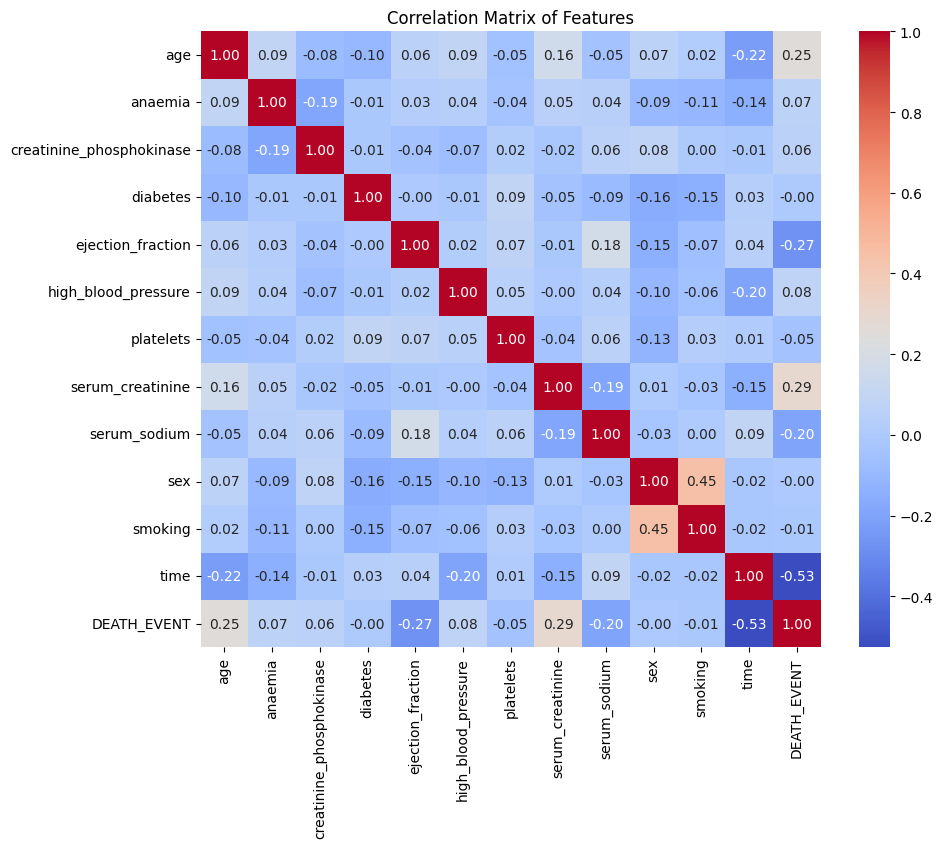

In [13]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

**Pisahkan fitur (X) dan label (y)**

In [9]:
# Separate features (X) and label (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

**Inisialisasi model SVM**

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        35
           1       1.00      0.16      0.28        25

    accuracy                           0.65        60
   macro avg       0.81      0.58      0.52        60
weighted avg       0.78      0.65      0.56        60



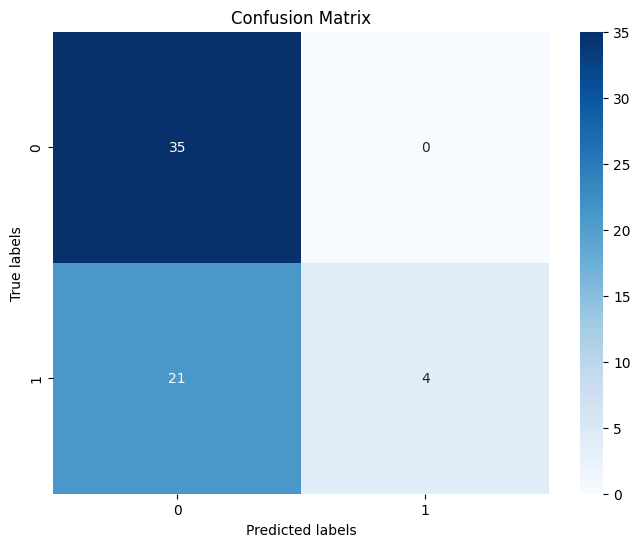

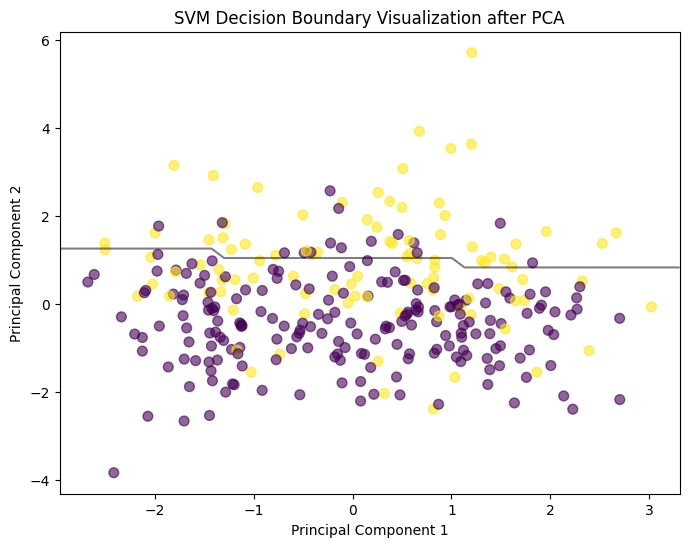

In [16]:

# Inisialisasi model SVM
svm_model = svm.SVC()

# Set hyperparameter yang akan diuji
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

# Grid Search Cross Validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Latih model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluasi model menggunakan data pengujian
y_pred = best_model.predict(X_test)

# Hitung dan cetak akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot data asal
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.6)

# Plot decision boundaries
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to visualize decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary contours
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary Visualization after PCA')
plt.show()
